# 1 Support Vector Machine:

Data and other details are available at 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Use the weblink and reproduce the result for SVM.

Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 
Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits? 
For both datasets, provide a step-by-step code, including:  

Loading the dataset 
Visualizing the data 
Splitting the data into training and testing sets 
Initializing and training the SVM model 
Testing the model 

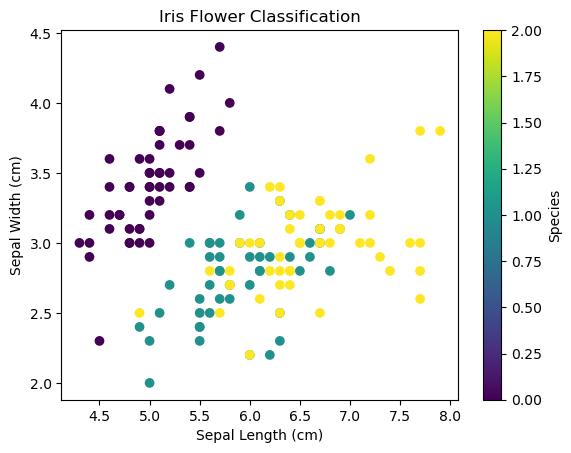

Accuracy: 90.00%
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



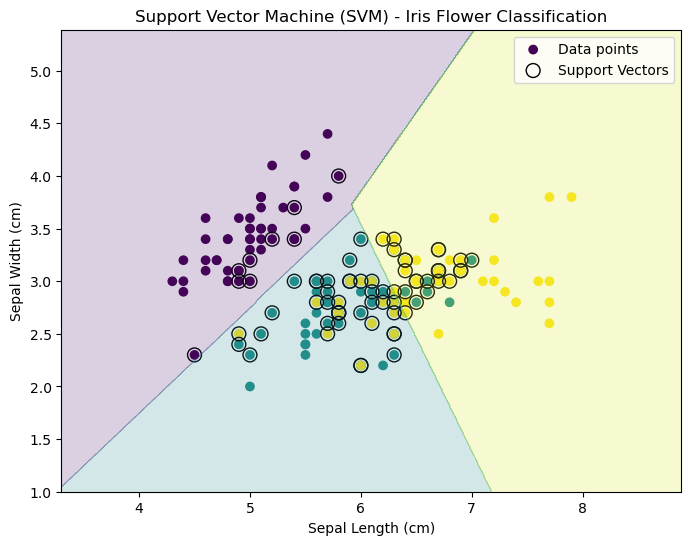

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Loading Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]   # Using only sepal length and width 
y = iris.target

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Flower Classification')
plt.colorbar(label='Species')
plt.show()

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model =SVC(kernel='linear', C=1.0, random_state=42)  #  SVC(kernel="poly", degree=3, gamma="auto", C=C)
svm_model.fit(X_train, y_train)

# Testing the model
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

print('Classification report')
print(classification_report(y_test, y_pred))


# Plotting the decision boundaries and support vectors
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Data points')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Plot support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Create a meshgrid for decision boundary plotting
x_min  = X[:, 0].min() - 1 
x_max = X[:, 0].max() + 1
x_pts = np.arange(x_min, x_max, 0.01)
y_min = X[:, 1].min() - 1
y_max =  X[:, 1].max() + 1
y_pts = np.arange(y_min, y_max, 0.01)
x, y = np.meshgrid(x_pts, y_pts )

Z = svm_model.predict(np.c_[x.ravel(), y.ravel()])   # Predict the class labels for the meshgrid points
Z = Z.reshape(x.shape)
# Plot decision boundaries
plt.contourf(x, y, Z, alpha=0.2, cmap='viridis')
plt.legend()
plt.title('Support Vector Machine (SVM) - Iris Flower Classification')
plt.show()


Accuracy: 98.70%
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



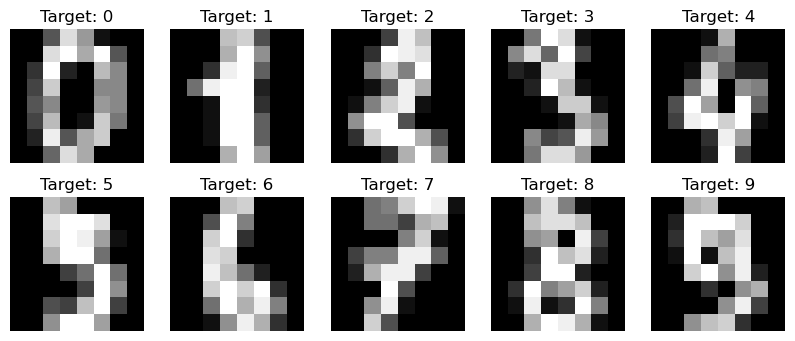

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Loading the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Visualize the data
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Target: {label}')
    ax.axis('off')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Testing the model
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))


# 2 Principal Component Analysis:

To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py. 
DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition). 
Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison). 
Are you getting the same result?

Covariance Matrix: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


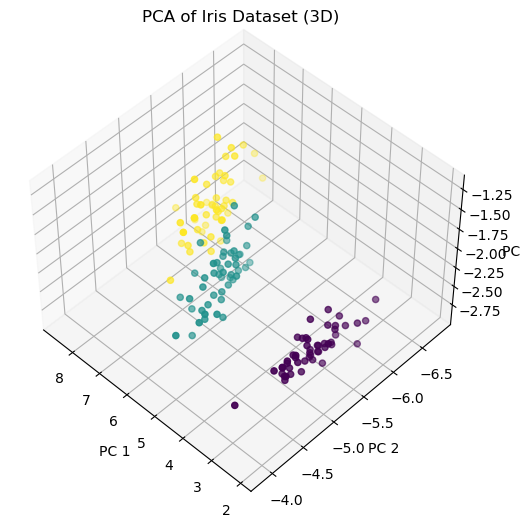

In [19]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Loading of the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# print(X)
# Normalise the dataset
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# print(X_std)
# Compute the covariance matrix
covariance_matrix = np.cov(X_std.T)
print("Covariance Matrix: \n",covariance_matrix)
# Perform Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sort_ind = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_ind]
eigenvectors = eigenvectors[:, sort_ind]
X_pca = X.dot(eigenvectors[:, :3])  # Projecting onto the first two principal components

# Plot the PCA results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA of Iris Dataset (3D)')
plt.show()



In [11]:
np.argsort(eigenvalues)[::-1]

array([0, 1, 2, 3], dtype=int64)

In [12]:
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

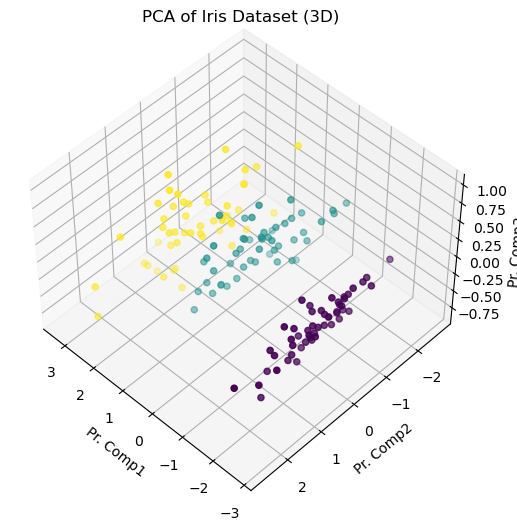

In [20]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize dataset
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# PCA using scikit-learn
pca = PCA(n_components=3)
X_pca_skl = pca.fit_transform(X_std)

# Plot the PCA results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.scatter(X_pca_skl[:, 0], X_pca_skl[:, 1], X_pca_skl[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Pr. Comp1')
ax.set_ylabel('Pr. Comp2')
ax.set_zlabel('Pr. Comp3')
ax.set_title('PCA of Iris Dataset (3D)')
plt.show()


In [10]:
np.mean(X, axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])